<a href="https://www.kaggle.com/code/lorraineferrusi/entry-level-insights-into-co2-emissions?scriptVersionId=125164473" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Welcome to my first data analysis workspace. I am aspiring to become a data analyst using Python and SQl to extract meaningful insights that will help with decision making processes. With a background and education in egnineering, I believe my critical thinking and attention to detail will help me achieve my goals, but first I need to build a solid foundation. This solid foundation will be my first step into the data analytics world and I look foprward to seeing where my journey will lead. This workspace is to showcase the basic findamentals of Python and SQL and how you can use these tools to answer simple questions extracted from large data frames.

In [1]:
# Import the pandas and numpy packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Load the data
cars = pd.read_csv('/kaggle/input/co2-emissions-canada/co2_emissions_canada.csv')

# create numpy arrays
cars_makes = cars['Make'].to_numpy()
cars_models = cars['Model'].to_numpy()
cars_classes = cars['Vehicle Class'].to_numpy()
cars_engine_sizes = cars['Engine Size(L)'].to_numpy()
cars_cylinders = cars['Cylinders'].to_numpy()
cars_transmissions = cars['Transmission'].to_numpy()
cars_fuel_types = cars['Fuel Type'].to_numpy()
cars_fuel_consumption = cars['Fuel Consumption Comb (L/100 km)'].to_numpy()
cars_co2_emissions = cars['CO2 Emissions(g/km)'].to_numpy()

# Preview the dataframe
cars

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244
...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.4,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.9,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,10.3,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,9.9,232


In [2]:
# median size in liters
median_size = cars["Engine Size(L)"].median()
print(f"The median engine size is {median_size} liters")

The median engine size is 3.0 liters


Fuel Type
D     8.84
E    16.86
N    12.70
X    10.08
Z    11.42
Name: Fuel Consumption Comb (L/100 km), dtype: float64
The average fuel consumption for D is 8.84 (L/100 km)
The average fuel consumption for E is 16.86 (L/100 km)
The average fuel consumption for Z is 11.42 (L/100 km)


<AxesSubplot:xlabel='Fuel Type'>

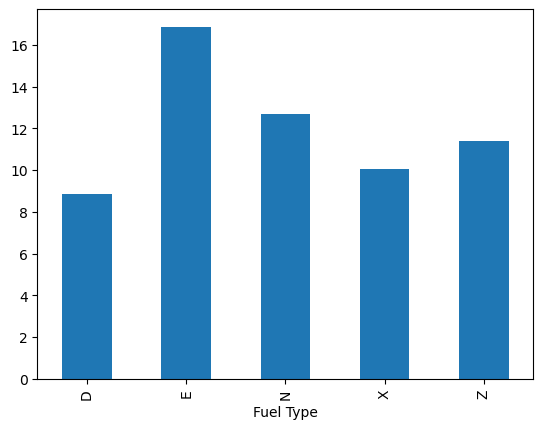

In [3]:
# average fuel consumption based on the type of fuel
ave_fuel_con = cars.groupby('Fuel Type')['Fuel Consumption Comb (L/100 km)'].mean().round(2)
print(ave_fuel_con)

gasoline = ['D', 'E', 'Z']
for i in gasoline:
    print(f"The average fuel consumption for {i} is {ave_fuel_con.loc[i]} (L/100 km)")

ave_fuel_con.plot.bar()

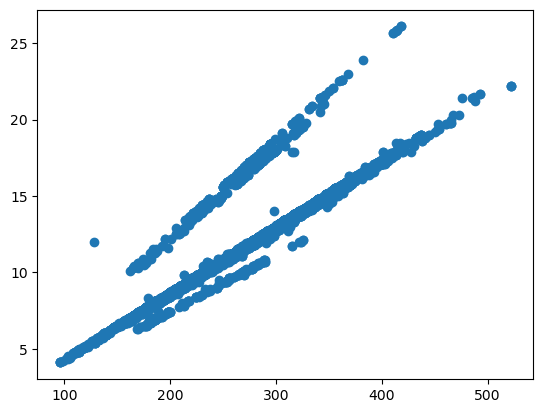

In [4]:
# correlation between consumption and CO2 emissions
corr_con_em = plt.scatter(cars["CO2 Emissions(g/km)"], cars["Fuel Consumption Comb (L/100 km)"])

Vehicle Class
COMPACT                     216.68
FULL-SIZE                   263.32
MID-SIZE                    222.46
MINICOMPACT                 236.61
MINIVAN                     262.31
PICKUP TRUCK - SMALL        278.97
PICKUP TRUCK - STANDARD     301.51
SPECIAL PURPOSE VEHICLE     237.60
STATION WAGON - MID-SIZE    238.70
STATION WAGON - SMALL       200.07
SUBCOMPACT                  246.45
SUV - SMALL                 236.29
SUV - STANDARD              304.84
TWO-SEATER                  277.45
VAN - CARGO                 361.50
VAN - PASSENGER             397.21
Name: CO2 Emissions(g/km), dtype: float64
The MID SIZE class has less CO2 emissions on average


<AxesSubplot:xlabel='Vehicle Class'>

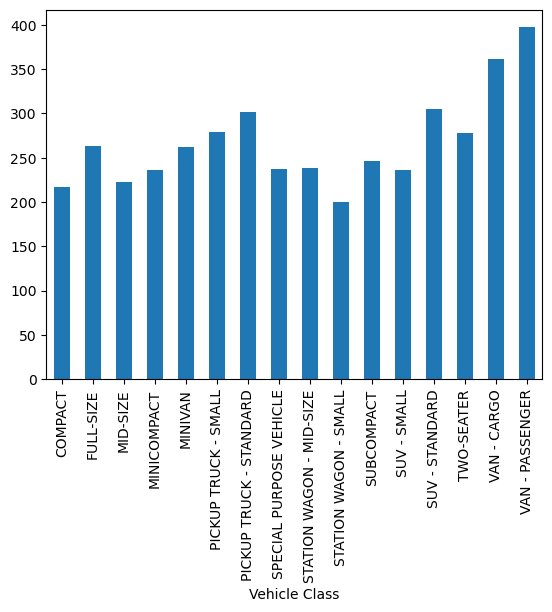

In [5]:
# class with lower CO2 emissions
ave_CO2_em = cars.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean().round(2)
print(ave_CO2_em)

suv_small = ave_CO2_em.loc['SUV - SMALL']
mid_size = ave_CO2_em.loc['MID-SIZE']

if suv_small < mid_size:
    print("The SUV SMALL class has less CO2 emissions on average")
else:
    print("The MID SIZE class has less CO2 emissions on average")

ave_CO2_em.plot.bar()

The avreage CO2 emissions for all the vehicles is 250.58 (g/km)
The average CO2 emissions for a 2.0 liter engine is 210.07 (g/km)


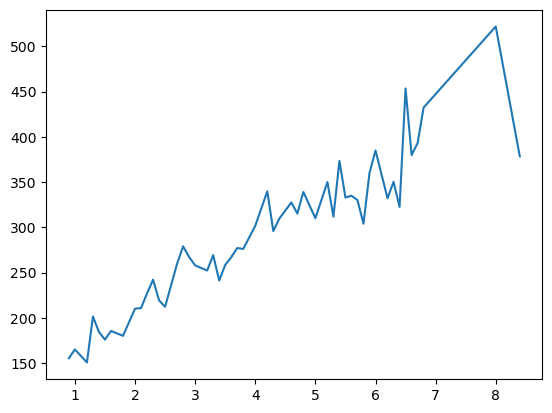

In [6]:
# average CO2 emissions
#  all vehicles? For vehicles with an engine size of 2.0 liters or smaller
ave_CO2_em_all = np.mean(cars_co2_emissions).round(2)
print(f"The avreage CO2 emissions for all the vehicles is {ave_CO2_em_all} (g/km)")

ave_CO2_engine = cars.groupby('Engine Size(L)')['CO2 Emissions(g/km)'].mean().round(2)
plt.plot(ave_CO2_engine)

print(f"The average CO2 emissions for a 2.0 liter engine is {ave_CO2_engine.loc[2]} (g/km)")

The make with the highest average fuel consumption is BUGATTI


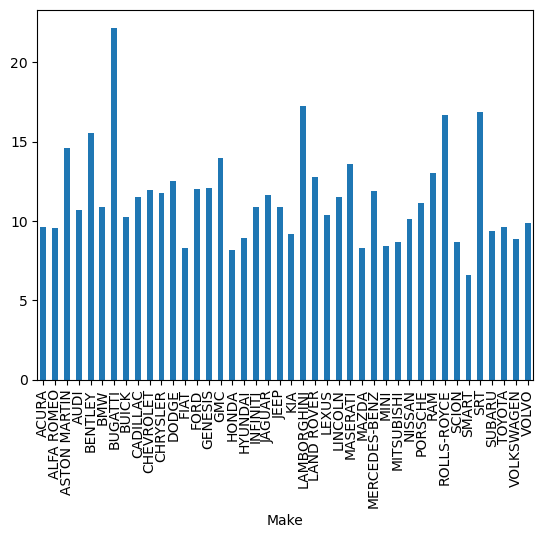

In [7]:
# vehicle make with the highest fuel consumption
fuel_con = cars.groupby('Make')['Fuel Consumption Comb (L/100 km)'].mean().round(2)
fuel_con.plot.bar()

make = list(cars_makes)

unique_makes = []
for x in make:
    if x not in unique_makes:
        unique_makes.append(x)
# print(unique_makes)

fuel_con_ave = []
for i in unique_makes:
    fuel_con_ave.append(fuel_con.loc[i])
# print(fuel_con_ave)

for a in fuel_con_ave:
    if a < a+1:
        continue
# print(a)

print(f"The make with the highest average fuel consumption is {unique_makes[fuel_con_ave.index(a)]}")